In [2]:
import cv2
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import glob
import os

# Set the path to the folder containing your images
image_folder = "/home/uwr/Desktop/output"

# Use glob to get all the image file paths in the folder
image_files = sorted(glob.glob(os.path.join(image_folder, "*.png")))  # Adjust extension if needed (e.g., .jpg, .jpeg)

# Initialize an empty list to store displacements
displacements = []

# Load the first frame
prev_frame = cv2.imread(image_files[0], cv2.IMREAD_GRAYSCALE)

# Iterate through the image sequence
for i in range(1, len(image_files)):
    # Load the next frame
    next_frame = cv2.imread(image_files[i], cv2.IMREAD_GRAYSCALE)
    
    # Calculate optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(prev_frame, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # Extract flow in x and y directions
    flow_x = flow[..., 0]
    flow_y = flow[..., 1]
    
    # Compute the displacement (magnitude of the flow vector)
    displacement = np.sqrt(flow_x**2 + flow_y**2)
    
    # Store the average displacement for the frame
    displacements.append(np.mean(displacement))
    
    # Update the previous frame to the current one
    prev_frame = next_frame

# Print or return the displacements for each frame
for i, d in enumerate(displacements):
    print(f"Displacement between frame {i} and {i+1}: {d:.2f}")


Displacement between frame 0 and 1: 0.02
Displacement between frame 1 and 2: 0.02
Displacement between frame 2 and 3: 0.01
Displacement between frame 3 and 4: 0.01
Displacement between frame 4 and 5: 0.20
Displacement between frame 5 and 6: 1.13
Displacement between frame 6 and 7: 3.09
Displacement between frame 7 and 8: 3.14
Displacement between frame 8 and 9: 2.51
Displacement between frame 9 and 10: 3.91
Displacement between frame 10 and 11: 2.35
Displacement between frame 11 and 12: 3.31
Displacement between frame 12 and 13: 3.16
Displacement between frame 13 and 14: 4.60
Displacement between frame 14 and 15: 1.57
Displacement between frame 15 and 16: 3.48
Displacement between frame 16 and 17: 7.03
Displacement between frame 17 and 18: 1.83
Displacement between frame 18 and 19: 3.31
Displacement between frame 19 and 20: 3.84
Displacement between frame 20 and 21: 3.34
Displacement between frame 21 and 22: 2.52
Displacement between frame 22 and 23: 4.46
Displacement between frame 23 

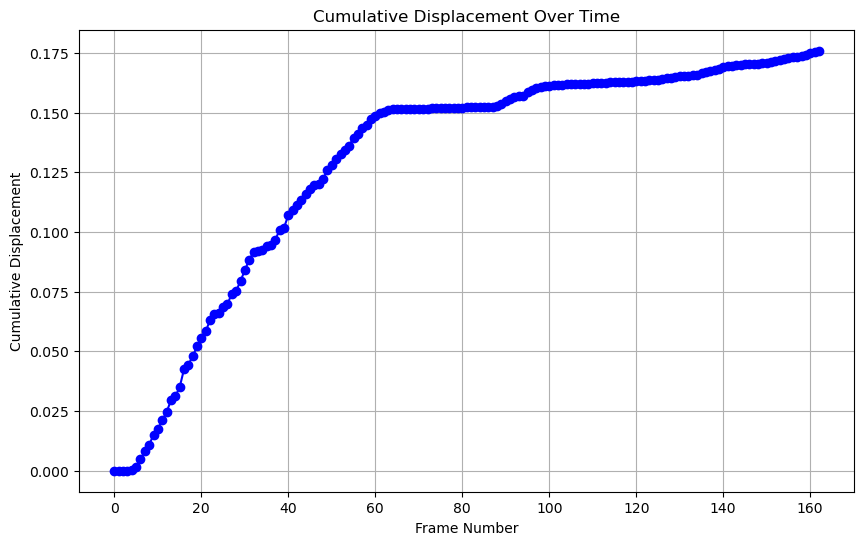

In [10]:
# Calculate cumulative displacement
cumulative_displacement = np.cumsum(displacements)*0.66/615

# Plot the cumulative displacement
plt.figure(figsize=(10, 6))
plt.plot(cumulative_displacement, marker='o', linestyle='-', color='b')
plt.title('Cumulative Displacement Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Displacement')
plt.grid(True)
plt.show()
